## import packages, define variables

In [46]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd # for creation of data frames
import numpy as np #
import seaborn as sns
import nibabel as nib # for loading niftis etc. as arrays
import matplotlib.pyplot as plt # for plotting data
#the output of plotting commands is displayed inline, directly below the code cell that produced it
%matplotlib inline 
import os,glob
from nilearn import plotting, input_data, image #for plotting & working with niftis

import pathlib
import pyxnat

###################### update path!! #####################################
base_path = '/home/tumnic/sepp/neuroenergeticslab_notebooks/erc-wp1/manuscript/' ####
##########################################################################

#import qBOLD functions
#import sys
#sys.path.append(os.path.join(base_path + 'scripts/'))
#import mqBOLD_functions as qB


### define FSL directories ######################################################
os.environ["FSLDIR"]='/usr/share/fsl/5.0'
os.environ["FSLOUTPUTTYPE"]='NIFTI_GZ'
os.environ["FSLTCLSH"]='/usr/bin/tclsh'
os.environ["FSLWISH"]='/usr/bin/wish'
os.environ["FSLMULTIFILEQUIT"]="True"
os.environ["LD_LIBRARY_PATH"]='/usr/share/fsl/5.0:/usr/lib/fsl/5.0'
#################################################################################

In [62]:
data_dir = base_path + 'data/'
derivatives_dir = data_dir + 'derivatives'
raw_dir = data_dir + 'rawdata'
results_dir = base_path + 'results'

sns.set_style("whitegrid")

## N=40
sids = [19, 20, 21, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68]
## N=30
sids_30 = [19, 20, 21, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55]

df_participants = pd.read_csv(data_dir + '/participants.tsv',sep='\t')

coords=(-15, 0, 15, 30, 45, 60, 75, 90)

### median across all subjects per paramater map, control condition, MNI space

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068


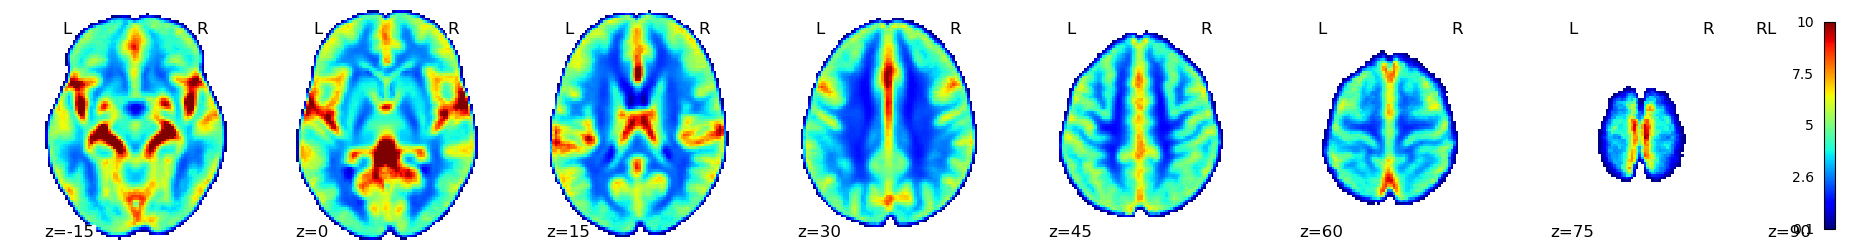

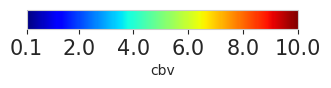

In [111]:
import matplotlib as mpl

cond='control'

parameters=['T2map', 'T2Smap', 'cbv', 'cbf', 'R2prime', 'oef', 'cmro2']
Br_MNI = nib.load(os.path.join(data_dir, 'derivatives', 'MNI152_T1_2mm_brain.nii.gz'))

for par in parameters:
    #par_map = np.zeros((len(sids), len_mask))
    par_map = np.zeros(shape=(91,109,91,len(sids))) #shape = MNI, 4D = length(sids)
    
    for i, ID in enumerate(sids): #loop over subjects
        sub = "sub-p{:03d}".format(ID) # subject id, eg 'p021'
        print(sub)
        
        sub_dir = os.path.join(data_dir, sub)

        dir_anat = os.path.join(sub_dir, 'anat')
        dir_func = os.path.join(sub_dir, 'func')
        dir_perf = os.path.join(sub_dir, 'perf')

        dir_anat_deriv = os.path.join(derivatives_dir, sub, 'anat')
        dir_func_deriv = os.path.join(derivatives_dir, sub, 'func')
        dir_perf_deriv = os.path.join(derivatives_dir, sub, 'perf')
        dir_qmri_deriv = os.path.join(derivatives_dir, sub, 'qmri')

        if par != 'T2map' and par != 'cmro2':
            par_nii =  os.path.join(dir_qmri_deriv, sub + '_task-'+cond+'_space-MNI152_'+ par +'.nii.gz')
        if par == 'T2map':
            par_nii =  os.path.join(dir_qmri_deriv, sub + '_space-MNI152_'+ par +'.nii.gz')
        if par == 'cmro2':
            par_nii =  os.path.join(dir_qmri_deriv, sub + '_task-'+cond+'_space-MNI152_desc-orig_'+ par +'.nii.gz')

        par_values = np.array(nib.load(par_nii).dataobj)
        #par_map[i, :] = masker.fit_transform(par_nii)
        par_map[:, :, :, i] = par_values
        if par == 'cbf': ##upscale
            par_map[:, :, :, i] = par_values/0.75
            

    ## median per voxel, across subjects
    par_map_median = np.nanmedian(par_map, axis=3)
    
    ##turn into nifti
    par_map_nii = nib.Nifti1Image(par_map_median, affine=Br_MNI.affine)
    
    ## plot nifti
    if par == 'T2map':
        min_thr=10
        max_thr= 150
        colormap= 'Greys_r'
        thr=10
        bound = [10, 40, 70, 100, 130]
    if par == 'T2Smap':
        min_thr=10
        max_thr= 100
        colormap= 'Greys_r'
        thr=10
        bound = [10, 40, 70, 100]
    if par == 'cbf':
        min_thr=5
        max_thr= 70
        colormap= 'jet'
        thr=5    
        bound = [5, 25, 45, 65]
    if par == 'cbv':
        min_thr=0.1
        max_thr= 10
        colormap= 'jet'
        thr=0.1
        bound = [0.1, 2, 4, 6, 8, 10]
    if par == 'R2prime':
        min_thr=2
        max_thr= 10
        colormap= 'jet'
        thr=2
        bound = [2, 4, 6, 8, 10]
    if par == 'oef':
        min_thr=0.1
        max_thr= 0.9
        colormap= 'jet'
        thr=0.1
        bound = [0.1, 0.3, 0.5, 0.7, 0.9]
    if par == 'cmro2':
        min_thr=10
        max_thr= 300
        colormap= 'jet'
        thr=10
        bound = [10, 50, 100, 150, 200, 250,300]
            
    ## plot median image
    plotting.plot_img(par_map_nii, threshold=thr, display_mode='z', vmin=min_thr, vmax=max_thr, cmap=colormap, colorbar=True, cut_coords=coords)
    fig.figure.savefig(results_dir+ '/' + par + '_median.png', format='png', dpi=300)
    
    ## plot colorbar separately
    ## draw stand-alone colourbar
    fig, ax = plt.subplots(figsize=(3.5, 0.5))
    fig.subplots_adjust(bottom=0.5)

    #cmap = mpl.cm.Greys_r
    bounds = bound
    norm = mpl.colors.Normalize(vmin=min_thr, vmax=max_thr)

    cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap), 
                 cax=ax, ticks=bounds, orientation='horizontal', label=par)
    cbar.ax.tick_params(labelsize=15)
    plt.tight_layout()
    
    fig.figure.savefig(results_dir + '/' + par + '_colorbar.png', format='png', dpi=300)

### boxplots, all conditions, subject space

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = T2map 73.90028343200683
std CTRL = T2map 1.4610246087347327
mean all conds = T2map 73.90028343200683
std all conds = T2map 1.4610246087347327


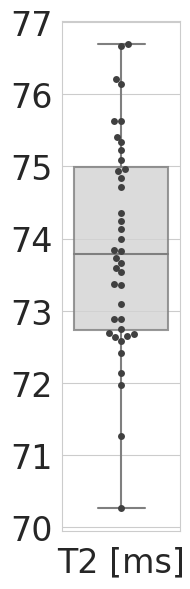

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = T2Smap 54.503682899475095
std CTRL = T2Smap 1.7902487314244377
mean all conds = T2Smap 54.59481489998954
std all conds = T2Smap 1.8368429602496952


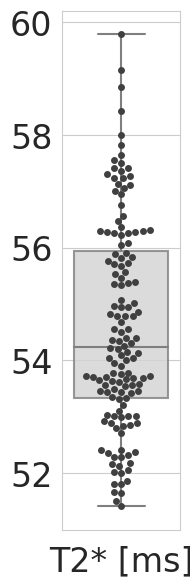

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = cbv 4.7844908237457275
std CTRL = cbv 0.20897234219519384
mean all conds = cbv 4.800386581420899
std all conds = cbv 0.21283800381468318


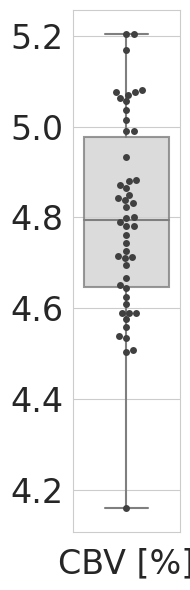

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = cbf 43.643300374348954
std CTRL = cbf 6.51181009775079
mean all conds = cbf 44.56105798993792
std all conds = cbf 7.242224169793608


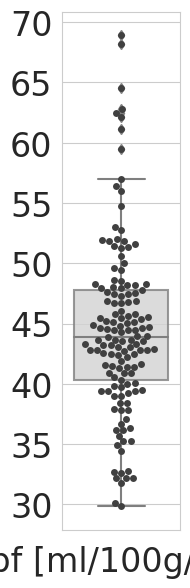

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = R2prime 5.356313025951385
std CTRL = R2prime 0.4010832313413822
mean all conds = R2prime 5.3282785790307186
std all conds = R2prime 0.4115569322452132


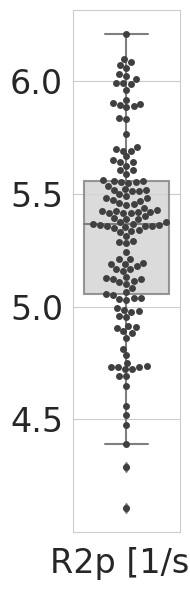

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = oef 0.3886345595121384
std CTRL = oef 0.03590349034577541
mean all conds = oef 0.3879062880362783
std all conds = oef 0.03734356127299282


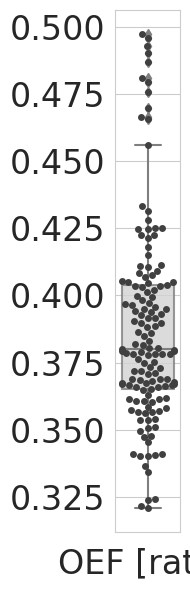

sub-p019
sub-p020
sub-p021
sub-p023
sub-p026
sub-p027
sub-p028
sub-p029
sub-p030
sub-p031
sub-p032
sub-p033
sub-p034
sub-p035
sub-p036
sub-p037
sub-p038
sub-p039
sub-p040
sub-p043
sub-p044
sub-p046
sub-p047
sub-p048
sub-p049
sub-p050
sub-p051
sub-p052
sub-p054
sub-p055
sub-p058
sub-p059
sub-p060
sub-p061
sub-p063
sub-p064
sub-p065
sub-p066
sub-p067
sub-p068
mean CTRL = cmro2 125.60910744637522
std CTRL = cmro2 16.32269887340223
mean all conds = cmro2 127.8485857291708
std all conds = cmro2 18.531117985735044


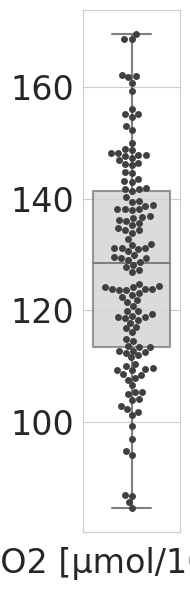

In [158]:
parameters=['T2map', 'T2Smap', 'cbv', 'cbf', 'R2prime', 'oef', 'cmro2']
fontsize=24
sns.set_style("whitegrid")

## load thresholded native-space parameter maps for each condition, average across GM and plot as boxplots
for par in parameters:
    par_val = np.zeros((len(sids), 4))
    par_val[:] = np.nan ##empy nan array
    par_GM_control = np.zeros((len(sids), 1))
    for i, ID in enumerate(sids): #loop over subjects
        sub = "sub-p{:03d}".format(ID) # subject id, eg 'p021'
        print(sub)

        sub_dir = os.path.join(data_dir, sub)

        dir_deriv = os.path.join(derivatives_dir, sub)

        if ID < 56:
            conds = ['rest', 'control', 'mem', 'calc']
        if ID > 55:
            conds = ['control', 'calc']        
        if par == 'T2map':
            conds = ['control']
        if par == 'cbv' and ID < 56:
            conds = ['control']
        if par == 'cbv' and ID >55:
            conds = ['control', 'calc']
            
        for k, cond in enumerate(conds):
            ## load parameter map
            if par != 'T2map' and par != 'cmro2':
                    par_nii =  os.path.join(dir_deriv, 'qmri', sub + '_task-'+cond+'_space-T2_'+ par +'_qBmasked.nii.gz')
            if par == 'T2map':
                    par_nii =  os.path.join(dir_deriv, 'qmri', sub + '_space-T2_'+ par +'_qBmasked.nii.gz')
            if par == 'cmro2' and cond == 'calc':
                    par_nii =  os.path.join(dir_deriv, 'qmri', sub + '_task-'+cond+'_space-T2_desc-CBV_'+ par +'_qBmasked.nii.gz')
            if par == 'cmro2' and cond != 'calc':
                    par_nii =  os.path.join(dir_deriv, 'qmri', sub + '_task-'+cond+'_space-T2_desc-orig_'+ par +'_qBmasked.nii.gz')
                    
            par_arr = np.array(nib.load(par_nii).dataobj)
            subj_median = np.nanmedian(par_arr[par_arr>0]) ##only values bigger than zero
            subj_mean = np.nanmean(par_arr[par_arr>0]) ##only values bigger than zero
            if par == 'cbf': ##upscale by 25%
                subj_median = subj_median/0.75
                subj_mean = subj_mean/0.75
                
            par_val[i, k] = subj_mean           
            
            ## control mean values  
            if cond == 'control':
                par_GM_control[i] = subj_mean
    
    ## mean per subject, sd across subjects, in ctrl       
    print('mean CTRL = ' + par + ' ' + str(np.nanmean(par_GM_control)))
    print('std CTRL = ' + par + ' '+ str(np.nanstd(par_GM_control)))
    
    ## mean per subject, sd across subjects, across conditions, as in barplots      
    print('mean all conds = ' + par + ' ' + str(np.nanmean(par_val.flatten())))
    print('std all conds = ' + par + ' '+ str(np.nanstd(par_val.flatten())))
    
    if par == 'T2map':
        label= 'T2 [ms]'
    if par == 'T2Smap':
        label= 'T2* [ms]'
    if par == 'cbv':
        label= 'CBV [%]'        
    if par == 'cbf':
        label= 'cbf [ml/100g/min]'
    if par == 'R2prime':
        label= 'R2p [1/s]'
    if par == 'oef':
        label= 'OEF [ratio]'
    if par == 'cmro2':
        label= 'CMRO2 [μmol/100g/min]'
        
    ## plot boxplot
    fig, ax = plt.subplots(1, figsize=(2,6))
    sns.boxplot(y=par_val.flatten(), color='lightgray', boxprops=dict(alpha=.8), ax=ax, orient="v")
    sns.swarmplot(y=par_val.flatten(), color=".25", ax=ax, orient="v")
    ax.set_xlabel(label, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()